<a href="https://colab.research.google.com/github/CarlaFFochs/Nuclio_DataScience_Projects/blob/main/Clase3_Preprocesamiento_en_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MASTER DATA SCIENCE: NUCLIO
## CLASE 3: EDA + Visualización + Preprocesamiento

In [80]:
'''
En este ejercicio vamos a analizar el dataset de un seguro médico, este dataset contiene características de una persona y el precio que se le aplica

Vamos a realizar lo siguiente:

EDA: Explorar los datos
Data Cleaning: Limpiar los datos en blanco, así como detectar outliers y errores lógicos de información
Visualization
Pre-processing
¡Vamos a ello!
'''

'\nEn este ejercicio vamos a analizar el dataset de un seguro médico, este dataset contiene características de una persona y el precio que se le aplica\n\nVamos a realizar lo siguiente:\n\nEDA: Explorar los datos\nData Cleaning: Limpiar los datos en blanco, así como detectar outliers y errores lógicos de información\nVisualization\nPre-processing\n¡Vamos a ello!\n'

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
#importamos librería
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [83]:
'''1. ESTRUCTURA DE DATOS '''

'1. ESTRUCTURA DE DATOS '

In [84]:
df_seguro= pd.read_csv("/content/drive/MyDrive/MASTER DATA SCIENCE/M3 - PREPROCESAMIENTO/Clase 3 - Preprocesamiento/Datasets/dataset_seguros_sin_nulos.csv", sep=";")

In [85]:
df_seguro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EDAD         1338 non-null   int64  
 1   SEXO         1338 non-null   object 
 2   IMC          1338 non-null   float64
 3   PESO         1338 non-null   int64  
 4   HIJOS        1338 non-null   int64  
 5   TIENE_HIJOS  1338 non-null   int64  
 6   FUMADOR      1338 non-null   object 
 7   CIUDAD       1338 non-null   object 
 8   PRECIO       1338 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 94.2+ KB


In [86]:
df_seguro.head() #tiene_hijos es un booleano

,EDAD,SEXO,IMC,PESO,HIJOS,TIENE_HIJOS,FUMADOR,CIUDAD,PRECIO
0,37,MASCULINO,29.830,80,2,1,NO,BARCELONA,534
1,25,MASCULINO,26.220,71,0,0,NO,BARCELONA,227
2,52,FEMENINO,30.780,83,1,1,NO,BARCELONA,900
3,23,MASCULINO,23.845,64,0,0,NO,BARCELONA,200
4,60,FEMENINO,36.005,97,0,0,NO,BARCELONA,1102


In [87]:
df_seguro.describe()

,EDAD,IMC,PESO,HIJOS,TIENE_HIJOS,PRECIO
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.667231,82.444694,1.091928,0.568759,1105.854260
std,14.049960,6.095439,16.389299,1.206345,0.495435,1009.161649
min,18.000000,15.960000,43.000000,0.000000,0.000000,93.000000
25%,27.000000,26.315000,71.000000,0.000000,0.000000,395.250000
50%,39.000000,30.400000,82.000000,1.000000,1.000000,781.500000
75%,51.000000,34.693750,93.000000,2.000000,1.000000,1386.500000
max,64.000000,53.130000,143.000000,5.000000,1.000000,5314.000000


In [88]:
'''2. DETECCION DE NULOS'''

'2. DETECCION DE NULOS'

In [89]:
df_seguro.isnull().sum()

EDAD           0
SEXO           0
IMC            0
PESO           0
HIJOS          0
TIENE_HIJOS    0
FUMADOR        0
CIUDAD         0
PRECIO         0
dtype: int64

In [90]:
'''3. VERIFICAMOS FILAS REPETIDAS'''

'3. VERIFICAMOS FILAS REPETIDAS'

In [91]:
df_seguro[df_seguro.duplicated(keep=False)]

,EDAD,SEXO,IMC,PESO,HIJOS,TIENE_HIJOS,FUMADOR,CIUDAD,PRECIO
378,19,MASCULINO,30.59,82,0,0,NO,SEVILLA,137
459,19,MASCULINO,30.59,82,0,0,NO,SEVILLA,137


In [92]:
df_seguro_sin_duplicados= df_seguro.drop_duplicates().copy()

In [93]:
df_seguro_sin_duplicados.reset_index(drop=True, inplace=True)

In [94]:
'''4. ANALISIS UNIVARIABLE'''

'4. ANALISIS UNIVARIABLE'

In [95]:
for i in df_seguro_sin_duplicados.columns:
  print("\n", i, df_seguro_sin_duplicados[i].value_counts(), "\n")


 EDAD 18    69
19    67
45    29
52    29
51    29
47    29
48    29
20    29
46    29
50    29
27    28
25    28
26    28
53    28
49    28
22    28
54    28
23    28
21    28
24    28
28    28
43    27
44    27
31    27
42    27
40    27
30    27
41    27
29    27
55    26
33    26
57    26
32    26
56    26
34    26
36    25
59    25
58    25
38    25
35    25
39    25
37    25
61    23
63    23
62    23
60    23
64    22
Name: EDAD, dtype: int64 


 SEXO MASCULINO    677
FEMENINO     660
Name: SEXO, dtype: int64 


 IMC 32.300    13
28.310     9
30.495     8
30.875     8
30.800     8
          ..
40.480     1
26.070     1
24.090     1
28.380     1
44.700     1
Name: IMC, Length: 547, dtype: int64 


 PESO 80     46
75     41
83     35
74     34
78     34
       ..
132     1
46      1
43      1
129     1
123     1
Name: PESO, Length: 89, dtype: int64 


 HIJOS 0    576
1    322
2    239
3    157
4     25
5     18
Name: HIJOS, dtype: int64 


 TIENE_HIJOS 1    761
0    576
Name: TIE

In [96]:
for i in df_seguro_sin_duplicados.columns:
  print("\n", i, df_seguro_sin_duplicados[i].unique(), "\n")


 EDAD [37 25 52 23 60 34 63 18 35 24 38 58 43 31 22 45 59 56 30 44 26 61 20 32
 42 40 47 27 41 36 64 28 53 33 29 50 55 49 54 46 57 48 39 21 62 51 19] 


 SEXO ['MASCULINO' 'FEMENINO'] 


 IMC [29.83  26.22  30.78  23.845 36.005 31.92  23.085 26.315 36.67  26.6
 37.05  38.665 35.625 31.825 27.36  28.5   39.805 26.885 38.285 19.95
 25.46  30.115 32.205 28.595 23.75  31.35  28.785 26.505 22.04  22.42
 32.49  37.145 23.37  25.175 28.215 18.905 15.96  33.155 41.895 39.33
 28.88  27.74  41.23  33.25  31.635 22.135 28.975 17.29  25.365 24.32
 32.395 25.84  27.455 28.12  40.565 27.645 48.07  36.765 29.64  22.99
 27.55  22.61  34.865 32.775 37.335 40.945 34.105 36.385 35.72  32.3
 33.345 35.245 30.4   22.23  24.89  17.955 30.685 31.445 38.38  20.235
 17.195 30.59  27.265 31.73  16.815 29.45  38.095 25.935 31.065 25.08
 27.93  26.03  25.27  32.11  30.875 33.915 39.425 28.025 35.435 41.325
 33.44  32.68  36.86  34.295 23.465 35.91  21.85  33.725 26.98  19.
 33.535 22.705 38.19  26.41  31.54  32.

In [97]:
'''5. SEPARAMOS NUESTRAS VARIABLES EN: TARGET, CATEGORICAS, BOOLEAN Y NUMERICAS'''

'5. SEPARAMOS NUESTRAS VARIABLES EN: TARGET, CATEGORICAS, BOOLEAN Y NUMERICAS'

In [98]:
df_seguro_sin_duplicados.head()

,EDAD,SEXO,IMC,PESO,HIJOS,TIENE_HIJOS,FUMADOR,CIUDAD,PRECIO
0,37,MASCULINO,29.830,80,2,1,NO,BARCELONA,534
1,25,MASCULINO,26.220,71,0,0,NO,BARCELONA,227
2,52,FEMENINO,30.780,83,1,1,NO,BARCELONA,900
3,23,MASCULINO,23.845,64,0,0,NO,BARCELONA,200
4,60,FEMENINO,36.005,97,0,0,NO,BARCELONA,1102


In [99]:
target= ["PRECIO"]

In [100]:
df_seguro_sin_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EDAD         1337 non-null   int64  
 1   SEXO         1337 non-null   object 
 2   IMC          1337 non-null   float64
 3   PESO         1337 non-null   int64  
 4   HIJOS        1337 non-null   int64  
 5   TIENE_HIJOS  1337 non-null   int64  
 6   FUMADOR      1337 non-null   object 
 7   CIUDAD       1337 non-null   object 
 8   PRECIO       1337 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 94.1+ KB


In [101]:
df_seguro_sin_duplicados["EDAD"].dtype #int8 (entero que tiene elemenos positivos y negativos) i el uint(este solo va de 0 a 64bits)

dtype('int64')

In [102]:
def obtener_lista_variables(dataset):
  lista_numericas = []
  lista_booleans = []
  lista_categoricas = []
  for i in dataset: #iterem per columnes perque estem fent dataset[i]
    if (dataset[i].dtype=='float64' or dataset[i].dtype=='int64') and (len(dataset[i].unique()) != 2) and i not in target:
      lista_numericas.append(i)
    elif (dataset[i].dtype=='float64' or dataset[i].dtype=='int64')and (len(dataset[i].unique()) == 2) and i not in target:
      lista_booleans.append(i)
    elif (dataset[i].dtype=='object') and i not in target:
      lista_categoricas.append(i)
  return lista_numericas, lista_booleans, lista_categoricas
#si quisieramos hacer cada condicion por linea solo hemos de poner \ para que python sepa que seguimos las condiciones
#e.g. if (dataset[i].dtype=='float64' or dataset[i].dtype=='int64') \ 
# and (len(df_seguro_sindup[i].unique()) != 2) \ 
#and i not in target:

In [103]:
l_numerica, l_boolean, l_categorica = obtener_lista_variables(df_seguro_sin_duplicados)

In [104]:
l_numerica

['EDAD', 'IMC', 'PESO', 'HIJOS']

In [105]:
l_boolean

['TIENE_HIJOS']

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa85cff2e10>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa85cff29d0>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa85cfc3ed0>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa85cf6a210>]]


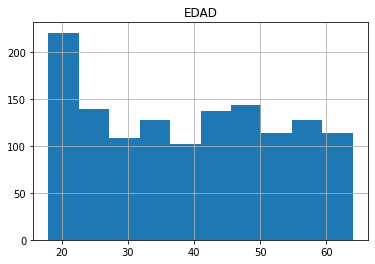

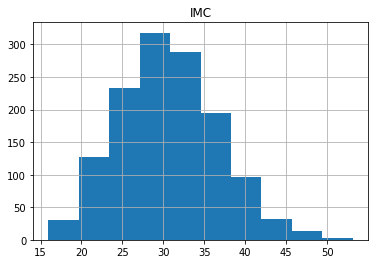

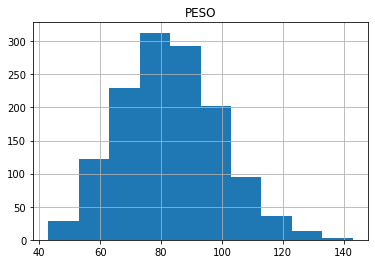

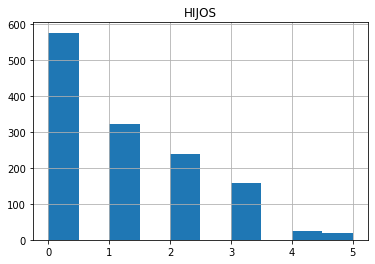

In [106]:
for i in l_numerica:
  print(df_seguro_sin_duplicados.hist(column= i))

In [107]:
for i in l_categorica:
  print(df_seguro_sin_duplicados[i].value_counts())


MASCULINO    677
FEMENINO     660
Name: SEXO, dtype: int64
NO    1063
SI     274
Name: FUMADOR, dtype: int64
MADRID       364
VALENCIA     325
BARCELONA    324
SEVILLA      324
Name: CIUDAD, dtype: int64


In [108]:
df_seguro_clean= df_seguro_sin_duplicados.copy() #el objetivo de esta copia es hacer un check point, porque ahora voy a transonformar el data set, por eso se hacen las copias

In [109]:
'''6. LOGICA DE LAS VARIABLES'''

'6. LOGICA DE LAS VARIABLES'

In [110]:
'''7. PREPROCESAMIENTO'''

'7. PREPROCESAMIENTO'

In [111]:
corr= df_seguro_clean.corr()

In [112]:
corr

,EDAD,IMC,PESO,HIJOS,TIENE_HIJOS,PRECIO
EDAD,1.000000,0.107742,0.110609,0.041016,0.044213,0.298308
IMC,0.107742,1.000000,0.997731,0.011157,0.013901,0.197793
PESO,0.110609,0.997731,1.000000,0.013540,0.015882,0.199910
HIJOS,0.041016,0.011157,0.013540,1.000000,0.788314,0.065633
TIENE_HIJOS,0.044213,0.013901,0.015882,0.788314,1.000000,0.061246
PRECIO,0.298308,0.197793,0.199910,0.065633,0.061246,1.000000


In [113]:
corr.style.background_gradient(cmap= "coolwarm") 
#las correlaciones son numericas siempre
#si son dependientes entre si,no tiene sentido que esten en el modelo
#tambien tiene que ser una distribución normal
#nos interesa es que no tengan relación entre ellas
#si es menor que 0.8 es muy probable que no tengan relación entre ellas, pero nos las quedamos


,EDAD,IMC,PESO,HIJOS,TIENE_HIJOS,PRECIO
EDAD,1.000000,0.107742,0.110609,0.041016,0.044213,0.298308
IMC,0.107742,1.000000,0.997731,0.011157,0.013901,0.197793
PESO,0.110609,0.997731,1.000000,0.013540,0.015882,0.199910
HIJOS,0.041016,0.011157,0.013540,1.000000,0.788314,0.065633
TIENE_HIJOS,0.044213,0.013901,0.015882,0.788314,1.000000,0.061246
PRECIO,0.298308,0.197793,0.199910,0.065633,0.061246,1.000000


In [114]:
#borramos el peso

del(df_seguro_clean["PESO"])


In [115]:
df_seguro_clean

,EDAD,SEXO,IMC,HIJOS,TIENE_HIJOS,FUMADOR,CIUDAD,PRECIO
0,37,MASCULINO,29.830,2,1,NO,BARCELONA,534
1,25,MASCULINO,26.220,0,0,NO,BARCELONA,227
2,52,FEMENINO,30.780,1,1,NO,BARCELONA,900
3,23,MASCULINO,23.845,0,0,NO,BARCELONA,200
4,60,FEMENINO,36.005,0,0,NO,BARCELONA,1102
...,...,...,...,...,...,...,...,...
1332,19,FEMENINO,20.600,0,0,NO,VALENCIA,144
1333,52,MASCULINO,38.600,2,1,NO,VALENCIA,860
1334,23,FEMENINO,33.400,0,0,NO,VALENCIA,900
1335,52,FEMENINO,44.700,3,1,NO,VALENCIA,951


In [116]:
'''7.1 CORRELACION: DETECTAR SI HAY VARIABLES QUE EXPLICAN LO MISMO'''


'7.1 CORRELACION: DETECTAR SI HAY VARIABLES QUE EXPLICAN LO MISMO'

In [117]:
'''7.2 ANALISIS DEL TARGET'''

'7.2 ANALISIS DEL TARGET'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa85e9c7310>]],
      dtype=object)

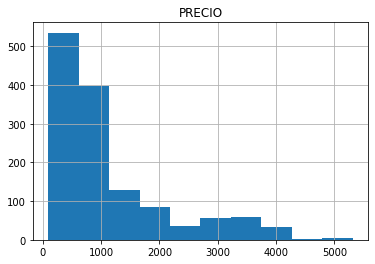

In [118]:
df_seguro_clean.hist(column= "PRECIO") #precio es la variable que se puede predecir

In [119]:
df_seguro_clean[df_seguro_clean["PRECIO"]>4500]

,EDAD,SEXO,IMC,HIJOS,TIENE_HIJOS,FUMADOR,CIUDAD,PRECIO
139,31,FEMENINO,38.095,1,1,SI,BARCELONA,4881
512,33,FEMENINO,35.530,0,0,SI,SEVILLA,4595
622,52,MASCULINO,34.485,3,1,SI,SEVILLA,5002
802,54,FEMENINO,47.410,0,0,SI,MADRID,5314
1004,45,MASCULINO,30.360,0,0,SI,MADRID,5216


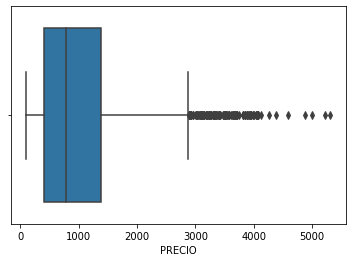

In [120]:
sns.boxplot(x=df_seguro_clean["PRECIO"]) #la mayor parte de peso esta concentrada entre 0-100, hay algunos puntos que salen de la caja. 
#no hay porque borrarlos, entonces, hay metodos:
#1) Transformar la variable precio --> una transformación que va muy bien es la estandarización logaritmica, para que los valores esten más concentrados
#2)el log de peso esta mas concentrado y funciona mejor. La predicción del precio nos dará logaritmica, pero despues se transforma otra vez y ya está.

In [121]:
df_seguro_clean["LOG_P"]= np.log10(df_seguro_clean["PRECIO"]) #el log sirve para estandarizar la función, por eso se transforma.


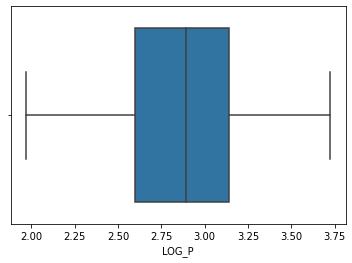

In [122]:
sns.boxplot(x=df_seguro_clean["LOG_P"])

In [123]:
'''7.3 TARGET VS VARIABLES INDEPENDIENTES'''

'7.3 TARGET VS VARIABLES INDEPENDIENTES'

In [124]:
l_categorica

['SEXO', 'FUMADOR', 'CIUDAD']

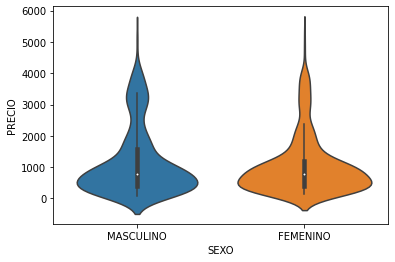

In [125]:
sns.violinplot(x="SEXO", y="PRECIO", data= df_seguro_clean) #se concentra toda la información entre 0-1000. el objetivo aqui es diferenciar si el sexo tiene un alto valor de significancia respecto el precio.
#aqui son muy parecidos. 

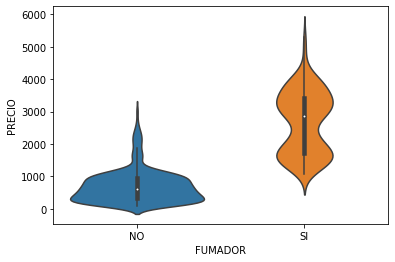

In [126]:
sns.violinplot(x="FUMADOR", y="PRECIO", data= df_seguro_clean)
#aqui se ve claro que los no fumadores pagan menos.

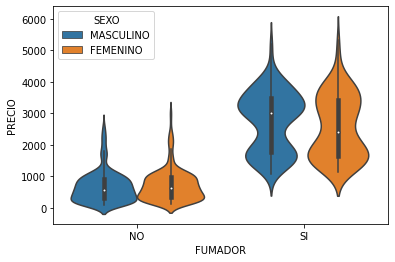

In [127]:
sns.violinplot(x="FUMADOR", y="PRECIO", hue="SEXO",data= df_seguro_clean)


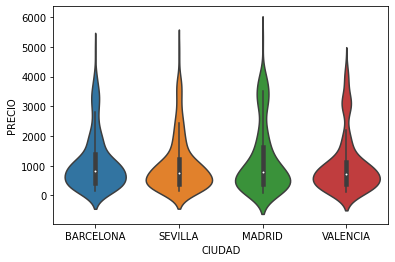

In [128]:
sns.violinplot(x="CIUDAD", y="PRECIO", data= df_seguro_clean)

In [129]:
#COMBINACION DE VARIABLES

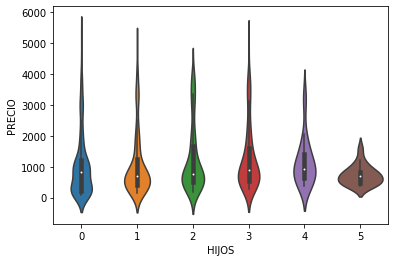

In [130]:
sns.violinplot(x="HIJOS", y="PRECIO", data= df_seguro_clean) #5HIJOS pagan menos

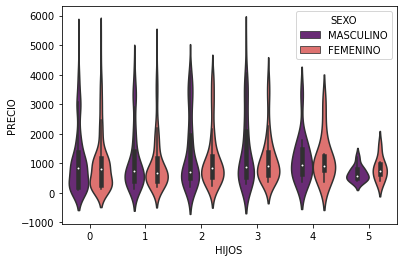

In [131]:
sns.violinplot(x="HIJOS", y="PRECIO", hue= "SEXO", data= df_seguro_clean, palette= "magma") #"hue" es como el groupby p

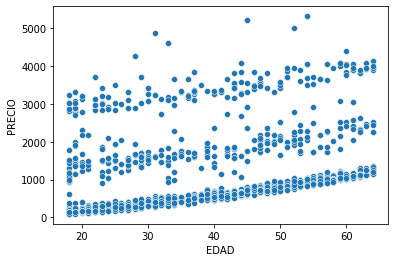

In [132]:
sns.scatterplot(x="EDAD", y= "PRECIO", data=df_seguro_clean)

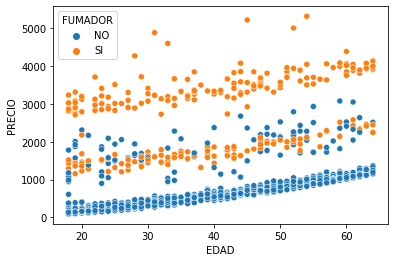

In [133]:
sns.scatterplot(x="EDAD", y= "PRECIO", hue= "FUMADOR", data=df_seguro_clean) #NO SALEN TODAS ARRIBA por el IMC, el fumador es una variable que va influir en el modelo.
#es improtante que no haya salido todo a la derecha concentrado, ya no nos hubiera servido.
#COMO SE COMPORTAN LAS VARIABLES EN FUNCION DE QUÉ QUIERO PREDECIR.

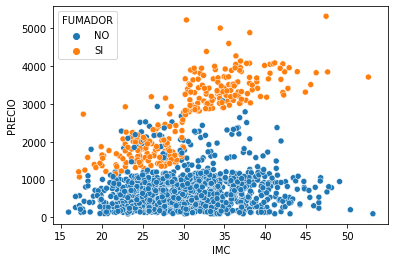

In [134]:
sns.scatterplot(x="IMC", y= "PRECIO", hue= "FUMADOR", data=df_seguro_clean)


In [135]:
'''7.4 REESCALAR VARIABLES'''

'7.4 REESCALAR VARIABLES'

In [136]:
#vamos a hacer un nuevo checkpoint

df_seguro_prep= df_seguro_clean.copy()

In [137]:
target= ["PRECIO", "LOG_P"]

In [138]:
l_numerica2, l_boolean2, l_categorica2= obtener_lista_variables(df_seguro_prep)

In [139]:
l_categorica2

['SEXO', 'FUMADOR', 'CIUDAD']

In [140]:
le= LabelEncoder()

In [141]:
df_seguro_prep["CIUDAD2"]=le.fit_transform(df_seguro_prep["CIUDAD"]) 

In [142]:
df_seguro_prep.tail()

,EDAD,SEXO,IMC,HIJOS,TIENE_HIJOS,FUMADOR,CIUDAD,PRECIO,LOG_P,CIUDAD2
1332,19,FEMENINO,20.6,0,0,NO,VALENCIA,144,2.158362,3
1333,52,MASCULINO,38.6,2,1,NO,VALENCIA,860,2.934498,3
1334,23,FEMENINO,33.4,0,0,NO,VALENCIA,900,2.954243,3
1335,52,FEMENINO,44.7,3,1,NO,VALENCIA,951,2.978181,3
1336,21,FEMENINO,25.8,0,0,NO,VALENCIA,167,2.222716,3


In [143]:
del(df_seguro_prep["CIUDAD2"])

In [144]:
df_seguro_prep_cate= pd.get_dummies(data=df_seguro_prep, prefix=None, prefix_sep=" ", columns= l_categorica2)

In [145]:
df_seguro_prep_cate=pd.get_dummies(data=df_seguro_prep,
                               prefix=None, 
                               prefix_sep="_",
                               columns=l_categorica2,
                               drop_first="True")


In [146]:
df_seguro_prep_cate

,EDAD,IMC,HIJOS,TIENE_HIJOS,PRECIO,LOG_P,SEXO_MASCULINO,FUMADOR_SI,CIUDAD_MADRID,CIUDAD_SEVILLA,CIUDAD_VALENCIA
0,37,29.830,2,1,534,2.727541,1,0,0,0,0
1,25,26.220,0,0,227,2.356026,1,0,0,0,0
2,52,30.780,1,1,900,2.954243,0,0,0,0,0
3,23,23.845,0,0,200,2.301030,1,0,0,0,0
4,60,36.005,0,0,1102,3.042182,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1332,19,20.600,0,0,144,2.158362,0,0,0,0,1
1333,52,38.600,2,1,860,2.934498,1,0,0,0,1
1334,23,33.400,0,0,900,2.954243,0,0,0,0,1
1335,52,44.700,3,1,951,2.978181,0,0,0,0,1


In [147]:
df_seguro_prep_cate.corr()


,EDAD,IMC,HIJOS,TIENE_HIJOS,PRECIO,LOG_P,SEXO_MASCULINO,FUMADOR_SI,CIUDAD_MADRID,CIUDAD_SEVILLA,CIUDAD_VALENCIA
EDAD,1.000000,0.107742,0.041016,0.044213,0.298308,0.526933,-0.019542,-0.025587,-0.012311,0.001495,0.009415
IMC,0.107742,1.000000,0.011157,0.013901,0.197793,0.131903,0.048800,0.003428,0.269794,-0.136556,-0.006571
HIJOS,0.041016,0.011157,1.000000,0.788314,0.065633,0.158026,0.018870,0.008586,-0.021958,0.027429,0.022928
TIENE_HIJOS,0.044213,0.013901,0.788314,1.000000,0.061246,0.149085,0.020126,0.011388,-0.000622,0.030259,0.007095
PRECIO,0.298308,0.197793,0.065633,0.061246,1.000000,0.893079,0.058033,0.787238,0.073575,-0.038700,-0.043637
LOG_P,0.526933,0.131903,0.158026,0.149085,0.893079,1.000000,0.007614,0.665713,0.014998,-0.015460,-0.042485
SEXO_MASCULINO,-0.019542,0.048800,0.018870,0.020126,0.058033,0.007614,1.000000,0.075079,0.015749,-0.014174,-0.005462
FUMADOR_SI,-0.025587,0.003428,0.008586,0.011388,0.787238,0.665713,0.075079,1.000000,0.068282,-0.036321,-0.037168
CIUDAD_MADRID,-0.012311,0.269794,-0.021958,-0.000622,0.073575,0.014998,0.015749,0.068282,1.000000,-0.345909,-0.346614
CIUDAD_SEVILLA,0.001495,-0.136556,0.027429,0.030259,-0.038700,-0.015460,-0.014174,-0.036321,-0.345909,1.000000,-0.320493


In [148]:
corr2= df_seguro_prep_cate.corr()
corr2

,EDAD,IMC,HIJOS,TIENE_HIJOS,PRECIO,LOG_P,SEXO_MASCULINO,FUMADOR_SI,CIUDAD_MADRID,CIUDAD_SEVILLA,CIUDAD_VALENCIA
EDAD,1.000000,0.107742,0.041016,0.044213,0.298308,0.526933,-0.019542,-0.025587,-0.012311,0.001495,0.009415
IMC,0.107742,1.000000,0.011157,0.013901,0.197793,0.131903,0.048800,0.003428,0.269794,-0.136556,-0.006571
HIJOS,0.041016,0.011157,1.000000,0.788314,0.065633,0.158026,0.018870,0.008586,-0.021958,0.027429,0.022928
TIENE_HIJOS,0.044213,0.013901,0.788314,1.000000,0.061246,0.149085,0.020126,0.011388,-0.000622,0.030259,0.007095
PRECIO,0.298308,0.197793,0.065633,0.061246,1.000000,0.893079,0.058033,0.787238,0.073575,-0.038700,-0.043637
LOG_P,0.526933,0.131903,0.158026,0.149085,0.893079,1.000000,0.007614,0.665713,0.014998,-0.015460,-0.042485
SEXO_MASCULINO,-0.019542,0.048800,0.018870,0.020126,0.058033,0.007614,1.000000,0.075079,0.015749,-0.014174,-0.005462
FUMADOR_SI,-0.025587,0.003428,0.008586,0.011388,0.787238,0.665713,0.075079,1.000000,0.068282,-0.036321,-0.037168
CIUDAD_MADRID,-0.012311,0.269794,-0.021958,-0.000622,0.073575,0.014998,0.015749,0.068282,1.000000,-0.345909,-0.346614
CIUDAD_SEVILLA,0.001495,-0.136556,0.027429,0.030259,-0.038700,-0.015460,-0.014174,-0.036321,-0.345909,1.000000,-0.320493


In [149]:
corr2.style.background_gradient(cmap="coolwarm")

,EDAD,IMC,HIJOS,TIENE_HIJOS,PRECIO,LOG_P,SEXO_MASCULINO,FUMADOR_SI,CIUDAD_MADRID,CIUDAD_SEVILLA,CIUDAD_VALENCIA
EDAD,1.000000,0.107742,0.041016,0.044213,0.298308,0.526933,-0.019542,-0.025587,-0.012311,0.001495,0.009415
IMC,0.107742,1.000000,0.011157,0.013901,0.197793,0.131903,0.048800,0.003428,0.269794,-0.136556,-0.006571
HIJOS,0.041016,0.011157,1.000000,0.788314,0.065633,0.158026,0.018870,0.008586,-0.021958,0.027429,0.022928
TIENE_HIJOS,0.044213,0.013901,0.788314,1.000000,0.061246,0.149085,0.020126,0.011388,-0.000622,0.030259,0.007095
PRECIO,0.298308,0.197793,0.065633,0.061246,1.000000,0.893079,0.058033,0.787238,0.073575,-0.038700,-0.043637
LOG_P,0.526933,0.131903,0.158026,0.149085,0.893079,1.000000,0.007614,0.665713,0.014998,-0.015460,-0.042485
SEXO_MASCULINO,-0.019542,0.048800,0.018870,0.020126,0.058033,0.007614,1.000000,0.075079,0.015749,-0.014174,-0.005462
FUMADOR_SI,-0.025587,0.003428,0.008586,0.011388,0.787238,0.665713,0.075079,1.000000,0.068282,-0.036321,-0.037168
CIUDAD_MADRID,-0.012311,0.269794,-0.021958,-0.000622,0.073575,0.014998,0.015749,0.068282,1.000000,-0.345909,-0.346614
CIUDAD_SEVILLA,0.001495,-0.136556,0.027429,0.030259,-0.038700,-0.015460,-0.014174,-0.036321,-0.345909,1.000000,-0.320493


In [150]:
df_seguro_prep_cate["EDAD"] #ES UNA SERIE, POR ESO HEMOS DE TRANSFORMARLO 

0       37
1       25
2       52
3       23
4       60
        ..
1332    19
1333    52
1334    23
1335    52
1336    21
Name: EDAD, Length: 1337, dtype: int64

In [151]:
df_seguro_prep_cate["EDAD"].values.reshape(-1,1) #el -1 (hasta el último) es para que me tome todos los calores, i el "1" es una columna. conviertemne en un array todo el valor.

array([[37],
       [25],
       [52],
       ...,
       [23],
       [52],
       [21]])

In [152]:
def minMaxTransformacion(variable_transformar, dataset):
  minMaxResultado=MinMaxScaler()   #normalizacion (x - ximin /(xmax-xmin))
  dataset[variable_transformar]=minMaxResultado.fit_transform(dataset[variable_transformar].values.reshape(-1,1))

  return minMaxResultado

In [153]:
minMax_edad= minMaxTransformacion("EDAD", df_seguro_prep_cate)

In [154]:
df_seguro_prep_cate.head()

,EDAD,IMC,HIJOS,TIENE_HIJOS,PRECIO,LOG_P,SEXO_MASCULINO,FUMADOR_SI,CIUDAD_MADRID,CIUDAD_SEVILLA,CIUDAD_VALENCIA
0,0.413043,29.830,2,1,534,2.727541,1,0,0,0,0
1,0.152174,26.220,0,0,227,2.356026,1,0,0,0,0
2,0.739130,30.780,1,1,900,2.954243,0,0,0,0,0
3,0.108696,23.845,0,0,200,2.301030,1,0,0,0,0
4,0.913043,36.005,0,0,1102,3.042182,0,0,0,0,0
